In [1]:
import sklearn
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split 
import numpy as np

In [3]:
data = pd.read_csv("../Downloads/twitter-airline-sentiment/Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Finding columns that are mostly empty 

In [9]:
(len(data)-data.count())/len(data)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [10]:
## Removing empty columns 
del data['airline_sentiment_gold']
del data['negativereason_gold']
del data['tweet_coord']

In [11]:
## Count comments corresponding to negative/neutral/positive 
sentiment_count = data['airline_sentiment'].value_counts()
print(sentiment_count)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


Text(0.5,1,'Sentiment v Sentiment count ')

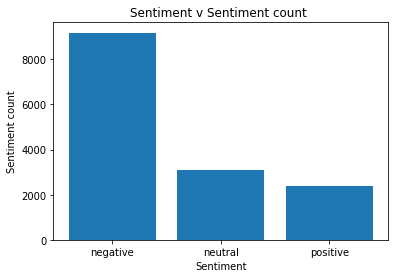

In [12]:
## Plot sentiments v.s Number of each sentiment 
plt.bar([1,2,3], sentiment_count)
plt.xticks([1,2,3], ['negative', 'neutral', 'positive'])
plt.ylabel('Sentiment count')
plt.xlabel('Sentiment')
plt.title('Sentiment v Sentiment count ')

In [15]:
!pip install wordcloud

    100% |████████████████████████████████| 163kB 3.8MB/s ta 0:00:01
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


                 tweet_id airline_sentiment  airline_sentiment_confidence  \
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
5      570300767074181121          negative                        1.0000   
15     570282469121007616          negative                        0.6842   
17     570276917301137409          negative                        1.0000   
20     570265883513384960          negative                        0.6705   
24     570256553502068736          negative                        1.0000   
25     570249102404923392          negative                        1.0000   
26     570239632807370753          negative                        1.0000   
28     570207886493782019          negative                        1.0000   
30     570114021854212096          negative                        1.0000   
32     570088404156698625          negative                        1.0000   

In [16]:
from wordcloud import WordCloud, STOPWORDS

In [30]:
## From negative sentiments, make wordcloud of most common words 
## removing words that are part of the website, removing words that are twitterhandles, removing words that are RT
df = data[data['airline_sentiment']=='negative']
neg_reasons = ' '.join(df['text'])
cleaned_words = ' '.join([word for word in neg_reasons.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse @VirginAmerica and it's a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat an

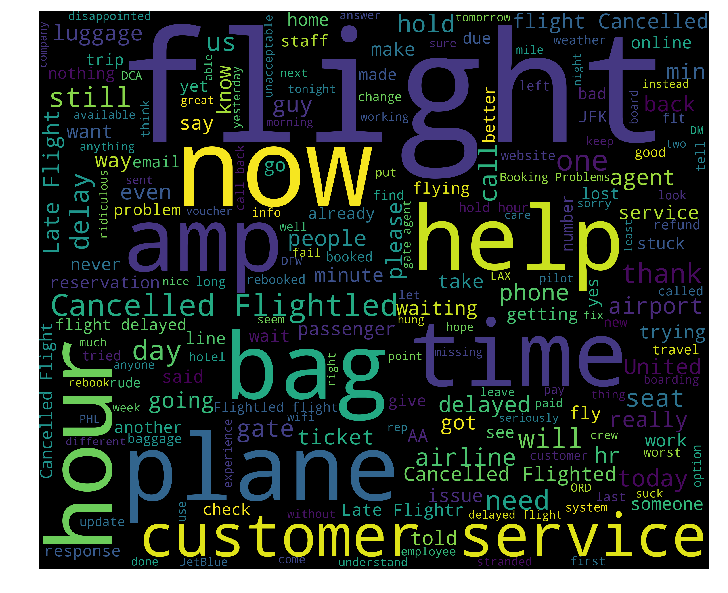

In [31]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [34]:
## From positive sentiments, 
df_pos = data[data['airline_sentiment']=='positive']
pos_reasons = ' '.join(df_pos['text'])
cleaned_words_pos = ' '.join([word for word in pos_reasons.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

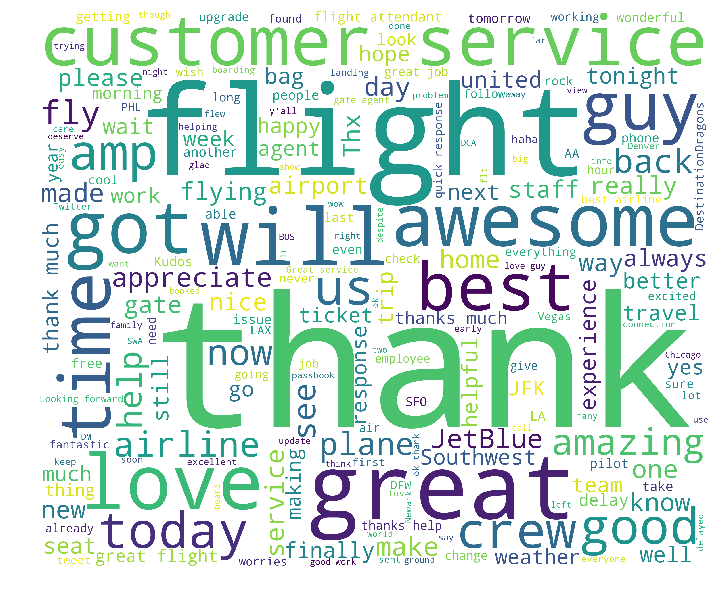

In [35]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_pos)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [36]:
# List airlines 
print(data['airline'].value_counts())

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


In [38]:
def plot(index, sentiment_count, airline):
    plt.bar(index, sentiment_count)
    plt.xticks(index, ['negative', 'neutral', 'positive'])
    plt.ylabel('Sentiment count for' + airline)
    plt.xlabel('Sentiment')
    plt.title('Sentiment v Sentiment count for' + airline)

# The representation below gives you a good overview of which airlines receive more negative reviews 

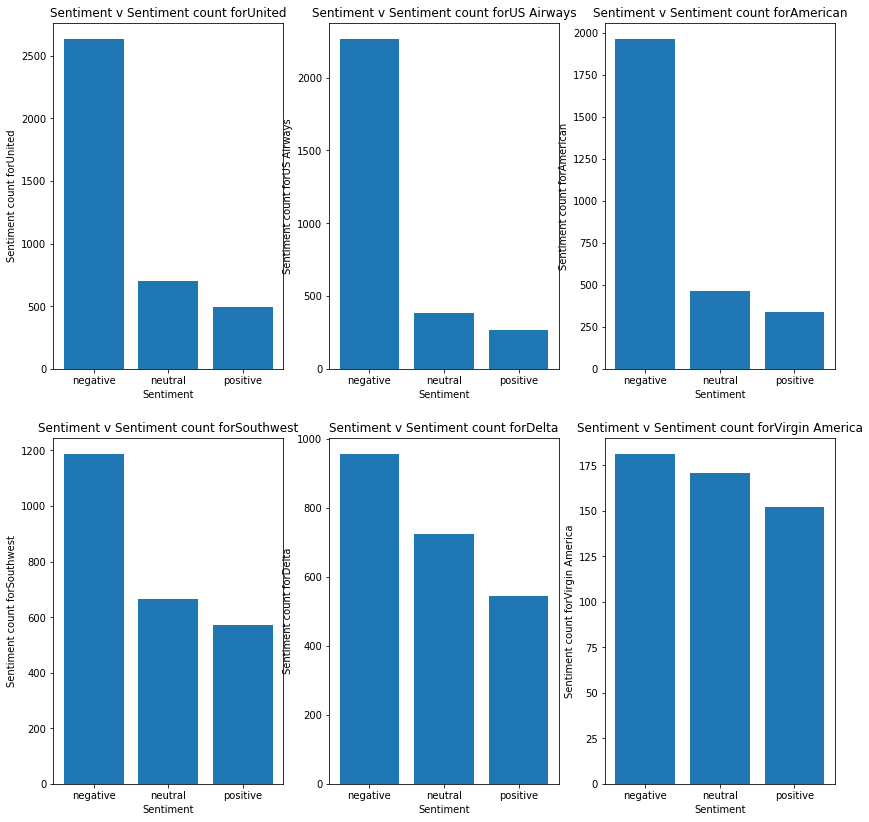

In [50]:
## Sort negative positive and neutral comments by airlines 
def sort_airlines(airline): 
    df = data[data['airline']==airline]
    sentiment_count = df['airline_sentiment'].value_counts()
    plot([1,2,3], sentiment_count, airline)

plt.figure(3, figsize=(14,14))
plt.subplot(231)
sort_airlines('United')
plt.subplot(232)
sort_airlines('US Airways')
plt.subplot(233)
sort_airlines('American')
plt.subplot(234)
sort_airlines('Southwest')
plt.subplot(235)
sort_airlines('Delta')
plt.subplot(236)
sort_airlines('Virgin America')


## With negative comments, we want to know the reasons why which is more constructive feedback for the airlines to improve


In [58]:
reasons = data['negativereason'].dropna()
print(reasons.value_counts())

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


In [73]:
def plot_bar(index, sentiment_comment_count, labels, airline):
    plt.bar(index, sentiment_comment_count)
    plt.xticks(index, labels, rotation=45)
    plt.ylabel('Neg reason count for '+ airline)
    plt.xlabel('Reason')
    plt.title('Negative reasons for '+ airline)

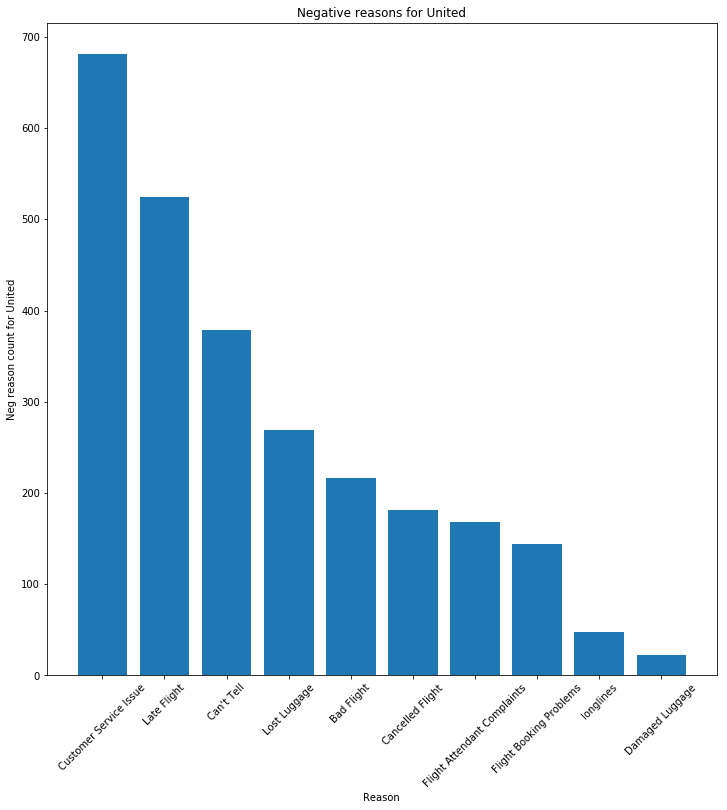

In [74]:
def why(airline, sentiment): 
    df = data[data['airline']==airline]
    sentiment_df = df[df['airline_sentiment']==sentiment]
    sentiment_df = sentiment_df['negativereason'].dropna()
    sentiment_comments = sentiment_df.value_counts()
    labels = sentiment_df.value_counts().index.tolist()
    Index = np.arange(1,11,1)
    plot_bar(Index, sentiment_comments, labels,airline)
plt.figure(1, figsize=(12,12))
#plt.subplot(231)
why('United', 'negative')
#plt.subplot(232)
#why('US Airways', 'negative')
#plt.subplot(233)
#why('American', 'negative')
#plt.subplot(234)
#why('Southwest', 'negative')
#plt.subplot(235)
#why('Delta', 'negative')
#plt.subplot(236)
#why('Virgin America', 'negative')
    

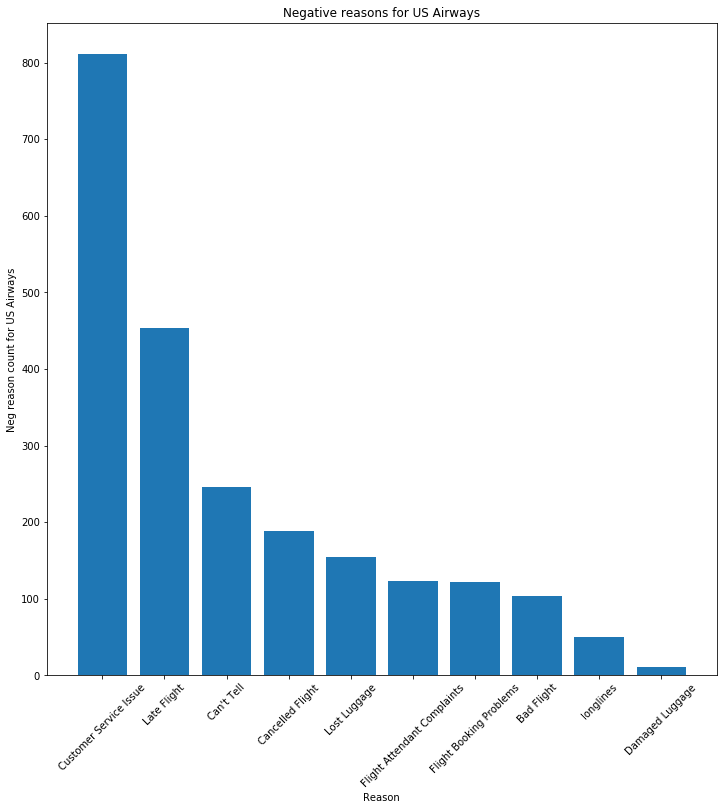

In [76]:
plt.figure(1, figsize=(12,12))
why('US Airways', 'negative')

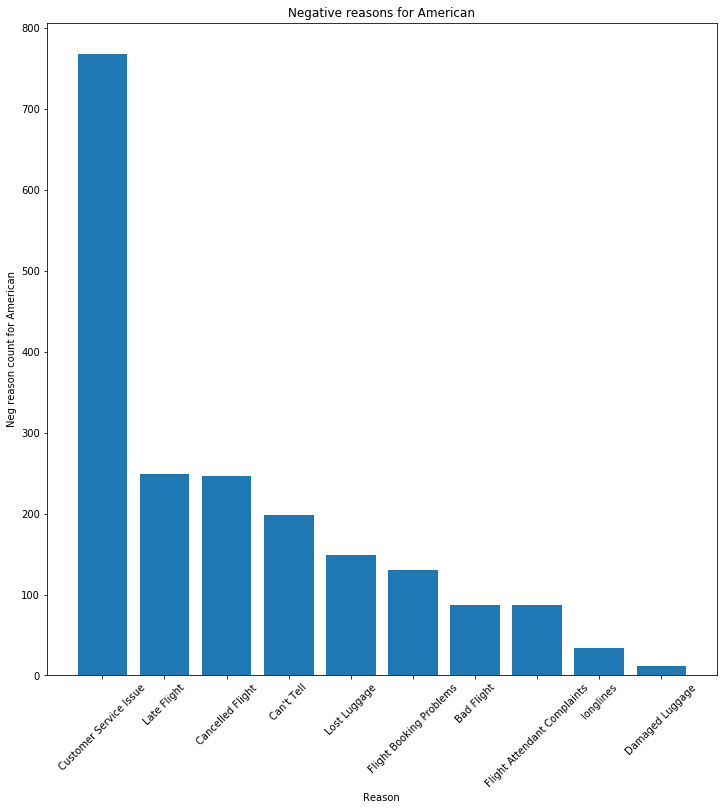

In [77]:
plt.figure(1, figsize=(12,12))
why('American', 'negative')

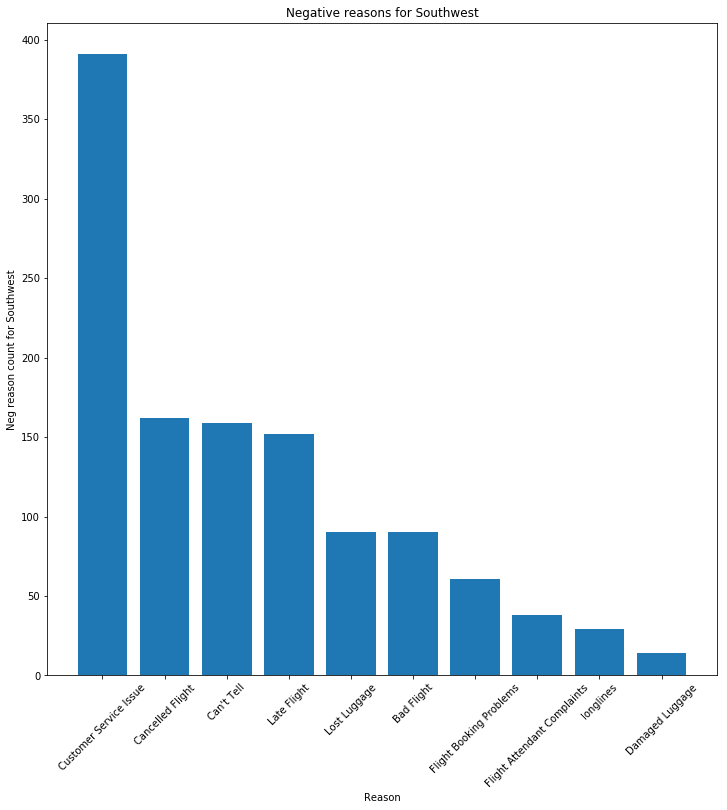

In [79]:
plt.figure(1, figsize=(12,12))
why('Southwest', 'negative')

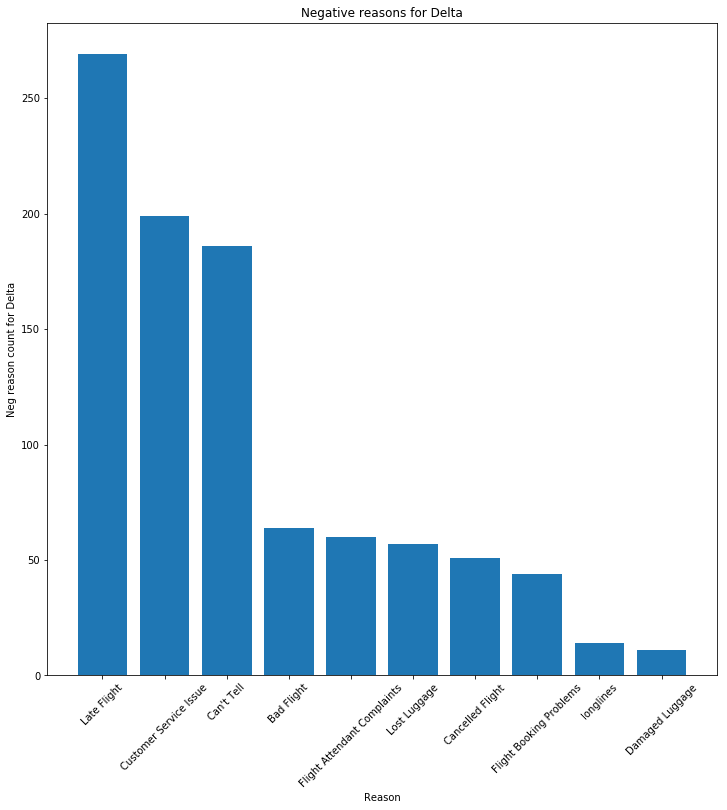

In [80]:
plt.figure(1, figsize=(12,12))
why('Delta', 'negative')

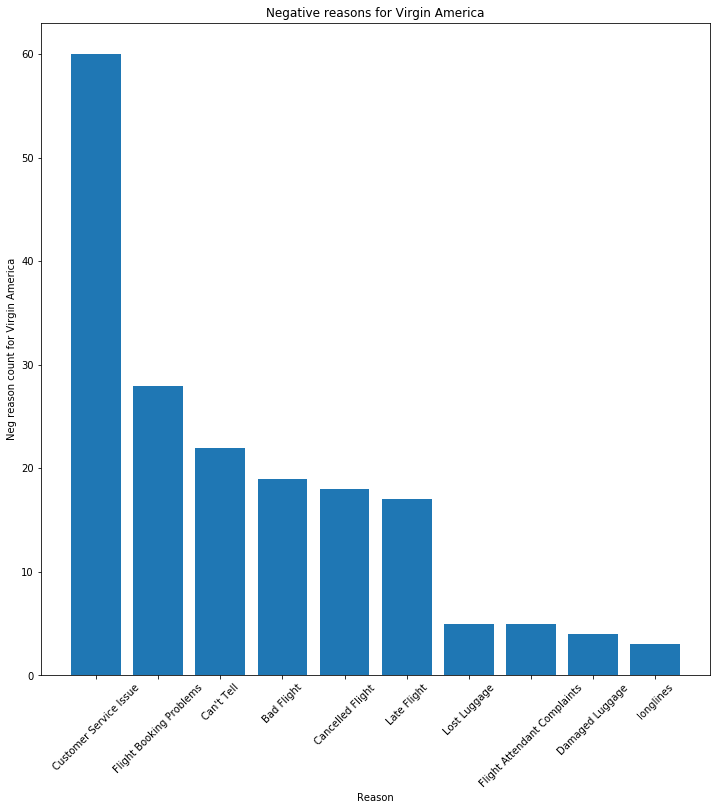

In [81]:
plt.figure(1, figsize=(12,12))
why('Virgin America', 'negative')

Data exploration tells us that we might want to classify the respective sentiment labels as positive, neutral, negative 
However, because the data distribution for the individual labels are not consistent, can't use our usual metric of accuracy 

Other preformance measures: 
1. Confusion matrix 
2. Precision 
3. Recall 
4. F1-Score 

## Data Preprocessing 

I'm thinking we're just classifying whether a particular text is negative, neutral or positive


In [92]:
!pip install nltk.corpus

  Could not find a version that satisfies the requirement nltk.corpus (from versions: )
No matching distribution found for nltk.corpus
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [90]:
import re 
import nltk
from nltk.corpus import stopwords 

In [93]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kristymualim/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [99]:
def stripdata(data): 
    words = (re.sub("[^a-zA-Z]", " ", data))
    return words

In [102]:
# does not include stop words 
def clean_words(data, stop_words): 
    words = stripdata(data)
    words = words.lower().split()
    stops = set(stopwords.words('english'))
    important_words = [w for w in words if not w in stops]
    return (" ".join(important_words))

In [ ]:
def clean_words_1(data): 
    words = stripdata(data)
    return words

In [151]:
## Changing labels to 0,1 
## Cleaning tweets in data['text']
#data['sentiment_label'] = data['airline_sentiment'].apply(lambda x:0 if x =='negative' else 1)
data['cleaned_words'] = data['text'].apply(lambda x: clean_words(x, stop_words))

In [152]:
data['new_length'] = data['cleaned_words'].apply(lambda x: len(x))

In [107]:
print(data['cleaned_words'])

0                              virginamerica dhepburn said
1        virginamerica plus added commercials experienc...
2        virginamerica today must mean need take anothe...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
5        virginamerica seriously would pay flight seats...
6        virginamerica yes nearly every time fly vx ear...
7        virginamerica really missed prime opportunity ...
8                                       virginamerica well
9            virginamerica amazing arrived hour early good
10       virginamerica know suicide second leading caus...
11       virginamerica lt pretty graphics much better m...
12       virginamerica great deal already thinking nd t...
13       virginamerica virginmedia flying fabulous sedu...
14                                    virginamerica thanks
15                virginamerica sfo pdx schedule still mia
16       virginamerica excited first cross country flig.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [203]:
from sklearn.model_selection import train_test_split
data.head()
new_df = data[['airline_sentiment', 'cleaned_words']]
#df_trn = data['cleaned_words']
print(new_df)

      airline_sentiment                                      cleaned_words
0               neutral                        virginamerica dhepburn said
1              positive  virginamerica plus added commercials experienc...
2               neutral  virginamerica today must mean need take anothe...
3              negative  virginamerica really aggressive blast obnoxiou...
4              negative                 virginamerica really big bad thing
5              negative  virginamerica seriously would pay flight seats...
6              positive  virginamerica yes nearly every time fly vx ear...
7               neutral  virginamerica really missed prime opportunity ...
8              positive                                 virginamerica well
9              positive      virginamerica amazing arrived hour early good
10              neutral  virginamerica know suicide second leading caus...
11             positive  virginamerica lt pretty graphics much better m...
12             positive  

In [204]:
# random permutation np array to shuffle 
np.random.seed(42)
new_df.sample(frac=1)

,airline_sentiment,cleaned_words
4794,positive,southwestair early frontrunner best airline os...
10480,negative,usairways flt ewr cancelled flightled yet flts...
8067,negative,jetblue going bdl dca flights yesterday today ...
8880,neutral,jetblue depart washington c
8292,negative,jetblue probably find ticket
927,negative,united still waiting hear back wallet stolen o...
3165,negative,united yes flight rebooked losing trust want g...
7894,neutral,jetblue thank paris could arrange something
2818,negative,united sure however ticket included one checke...
9145,positive,usairways great crew flight phx yvr tonight fr...


In [189]:
trn_texts, val_texts = sklearn.model_selection.train_test_split(df_trn, test_size=0.1)

In [190]:
len(trn_texts), len(val_texts)

(13176, 1464)

In [205]:
train, valid = train_test_split(new_df, stratify=new_df['airline_sentiment'],test_size = 0.4, random_state=12)
train.shape, valid.shape

((8784, 2), (5856, 2))

In [192]:
print(train.head())

                                           cleaned_words airline_sentiment
13262  americanair ok one help bag lost honeymoon mon...          negative
3914   united lt lt lt lt lt shoddy customer service ...          negative
6974          jetblue fleet fleek http co ajm bhjvaa foh           neutral
5658                         southwestair murraysawchuck           neutral
14310         americanair tired sitting delayed computer          negative


## Building the ULMFit Model

In [82]:
!pip install fastai

    100% |████████████████████████████████| 184kB 7.6MB/s ta 0:00:01
    100% |████████████████████████████████| 27.6MB 1.7MB/s eta 0:00:01
    100% |████████████████████████████████| 2.7MB 5.2MB/s ta 0:00:011
    100% |████████████████████████████████| 614kB 2.6MB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 2.0MB/s ta 0:00:011
    100% |████████████████████████████████| 153kB 10.7MB/s ta 0:00:01
    100% |████████████████████████████████| 194kB 7.0MB/s ta 0:00:011
    100% |████████████████████████████████| 153kB 10.0MB/s ta 0:00:01
    100% |████████████████████████████████| 143kB 11.3MB/s ta 0:00:01


  Stored in directory: /Users/kristymualim/Library/Caches/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
  Stored in directory: /Users/kristymualim/Library/Caches/pip/wheels/74/17/3f/c77bba99efd74ba1a19862c9dd97f4b6d735e2826721dc00ff
  Stored in directory: /Users/kristymualim/Library/Caches/pip/wheels/5b/d7/0f/e58eae695403de585269f4e4a94e0cd6ca60ec0c202936fa4a
  Stored in directory: /Users/kristymualim/Library/Caches/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
  Stored in directory: /Users/kristymualim/Library/Caches/pip/wheels/f0/02/4c/525b56fce78c415eb8066f6554f9de02792df26b8f882f6d65
Successfully built nvidia-ml-py3 regex dill ujson msgpack
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.3 which is incompatible.
  Found existing installation: msgpack 0.6.1
    Uninstalling msgpack-0.6.1:
      Successfully uninstalled msgpack-0.6.1
You are using pip version 19.0.2, however version 19.0.3 is available.
You shou

In [113]:
import fastai
from fastai import *
from fastai.text import * 

Preparing data for language and classification model 

In [206]:
# Language model data, Classifier model data 
data_lm = TextLMDataBunch.from_df(path="",train_df = train, valid_df = valid)

data_cm = TextClasDataBunch.from_df(path="", train_df = train, valid_df = valid, vocab = data_lm.train_ds.vocab, bs=32)

In [207]:
data_lm.show_batch()

idx,text
0,see site aa agent loss words xxbos united boeing star alliance short finals heathrowairport l amazing xxunk morning avgeek http co xxunk xxbos united trying change flight booked hours ago online system charging fee per passenger could please help xxbos virginamerica need receipt flight change send one xxbos southwestair flight cancelled flightled new flight hours late flightr sleep airport tonight ca nt even give boarding group seat thx xxbos united
1,accident ua passing information us waiting plane xxbos americanair ok late flight matter flight cancelled flighted morning yyz since xxbos southwestair awesome thank xxbos usairways thanks however feel like system failed solution xxbos united still waiting find rep working hard upset wait tomorrow pm get xxunk xxbos southwestair bunch liars cancelled flightled flight rebooked us four days late flightr xxbos americanair would take long credit card company says card charged
2,much money unhappy xxbos united overbooked xxunk people worst xxbos southwestair need tsa pre show flight mine xxbos americanair bag flew aa flew delta still sure whose final carrier xxunk xxbos soon sending son home saturday jetblue xxbos united already rescheduled flight cancelled flightled hotel room paid xxbos yo xxunk xxunk give southwestair plane back mad amp xxunk take away companion pass luv xxbos americanair running one flight mins next
3,planned trip xxunk xxunk xxunk xxbos usairways flight waiting weight balance info past minutes xxbos americanair flight xxunk jfk delayed cancelled flighted xxbos jetblue delay flights redirect gate tell stuck original gate would xxbos americanair hold another hour still nothing cancelled flighted flight supposed six hours stranded xxbos usairways addition xxunk blog agents pleasant experience less xxbos americanair past hours call volume high one take call cancelled flight itinerary xxunk
4,flightlation xxbos southwestair find cheap flight dc st louis prices went like crazy april weekends xxbos americanair someone actually either call back help figure getting home xxbos usairways know tried call confirmation calls going thru let know xxbos usairways amp seats together fees seems taking flight least wave xxbos southwestair important accept others swadiversity xxbos southwestair luv companion pass xxbos americanair trying make reservation lt year old lap child see


In [208]:
## Numericalization 
data_lm.train_ds[0][0].data[:10]

array([   2,   11,  224,   31,   20,   41,   98, 1471,  544,  180])

Fine-Tuning pre-trained model, downloading pre-trained weights and ready for fine-tuning 

In [212]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
# Training the learner object with a low learning rate 
learn.fit_one_cycle(1, 1e-2)


epoch,train_loss,valid_loss,accuracy
1,8.513956,7.241115,0.082173


In [213]:
learn.unfreeze()

In [214]:
learning_rates = [1e-3, 1e-4, 1e-6, 1e-7]
for i in learning_rates: 
    learn.fit_one_cycle(1, i)

epoch,train_loss,valid_loss,accuracy
1,6.738109,5.996800,0.154152


epoch,train_loss,valid_loss,accuracy
1,6.279507,5.884995,0.155580


epoch,train_loss,valid_loss,accuracy
1,6.239452,5.883557,0.155313


epoch,train_loss,valid_loss,accuracy
1,6.238729,5.883437,0.155268


## Best learning rate = 1e-6

In [215]:
#learn.predict("This review is about", n_words=10)


In [198]:
# saving the model 
learn.save_encoder('ft_enc')

In [199]:
learn = text_classifier_learner(data_cm, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')

In [172]:
data_cm.show_batch()

text,target
xxbos 0,jetblue tell point u realize u fly dca tonight u cancelled flightled pm u cancelled flight
xxbos 1,usairways askpaypal contacted bank took money today also contacted usairways said reservation
xxbos 0,united laurasbrown dealing via email anything crappy web form made mobile devices
xxbos 1,southwestair magazine feature desk plants increase productivity luvswa healthbenefitsofplants gardening http co bvfaxdubaq
xxbos 0,usairways rd connecting flight delayed still cannot make amp still unable speak real person


In [200]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,9.525854,9.169263,0.000000


In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))